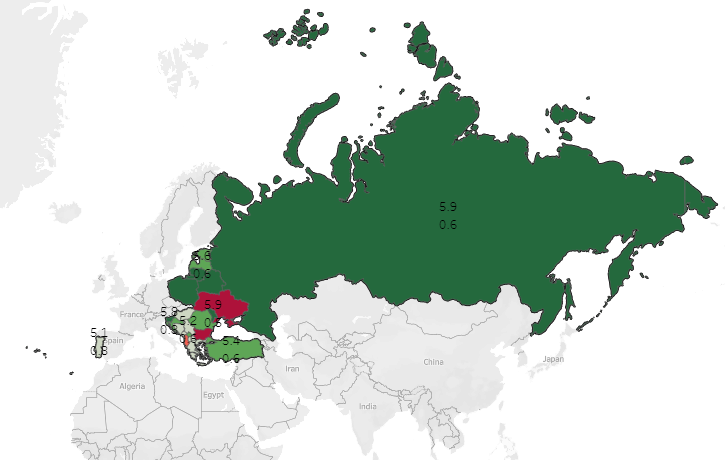
# Factors influencing the happiness index in different countries
Check Tableau for interactive visualizations:

[World Map Viz](https://public.tableau.com/views/WorldHappinessDemo_16883002187240/Sheet2?:language=en-US&:display_count=n&:origin=viz_share_link)

[Interactive Correlations Dashboard](https://public.tableau.com/views/HappinessComparisons_16883060534840/Dashboard1?:language=en-US&:retry=yes&:display_count=n&:origin=viz_share_link)




In [1]:
import sqlite3 #to use SQLite language
import pandas as pd #for data analysis
import os #for directory management
import matplotlib.pyplot as plt #for visualizations and graphs
import seaborn as sns  #for visualizations and graphs


## Summary:
In this analysis, we compare the relationship between some factors that influence the happiness index of the inhabitants of various countries between 2015 and 2017. The objective is to analyze how the factors are related to each other.

## Import Data
The data used in this analysis was downloaded from the Google Carrer Certificates Tableau page. This study contains data from 2015, 2016, and 2017. The data set is composed of several tables that represent a racteristic of each country.

**Tables**
>_eonomy_gdp_ (Country, year, economy_gdp)

>_family (Country, year, family)

>_generosity_ (Country, year, generosity)

>_goverment_trust_ (Country, year, trust_government_corruption)

>_health_live_expectancy (Country, year, health)

>_happiness (Country, year, happiness)

In [2]:
os.getcwd() #print the location directoryb

'C:\\Users\\FAURY\\Desktop\\Jupyter Notebooks\\World Happiness Case Study SQL_PYTHON_JUPYTER-NB'

In [3]:

# make a variable containing the path of the data

path1='C:\\Users\\DATABASE_FILE_PATH'

#make a connection between SQLite and the path variable(data)
connection1=sqlite3.connect(path1)

#make a cursor to interact wit the content in teh data
cursor1=connection1.cursor()


## Observe data

In [4]:
#Save tables into varianbles
#Create a funtion to run the query that recives the table's nasme and returns the query's resulting table

def table_var(x):
    query=f"""
SELECT *
FROM {x}
ORDER BY Country 
"""
    return query

health = pd.read_sql_query(table_var("health"),connection1)
happiness = pd.read_sql_query(table_var("happiness"),connection1)
economy = pd.read_sql_query(table_var("economy"),connection1)
government = pd.read_sql_query(table_var("government"),connection1)
family = pd.read_sql_query(table_var("family"),connection1)
generosity = pd.read_sql_query(table_var("generosity"),connection1)

In [5]:
health.head(5)


,country,year,health_live_expectancy
0,Afghanistan,2017,0.2
1,Afghanistan,2016,0.2
2,Afghanistan,2015,0.3
3,Albania,2017,0.7
4,Albania,2016,0.7


In [6]:
happiness.head(5)

,country,year,happiness_score
0,Afghanistan,2017,3.8
1,Afghanistan,2016,3.4
2,Afghanistan,2015,3.6
3,Albania,2017,4.6
4,Albania,2016,4.7


In [7]:
economy.head(5)

,country,year,economy_gdp
0,Afghanistan,2017,0.4
1,Afghanistan,2016,0.4
2,Afghanistan,2015,0.3
3,Albania,2017,1.0
4,Albania,2016,1.0


In [8]:
government.head(5)

,country,year,trust_government_corruption
0,Afghanistan,2017,0.3
1,Afghanistan,2016,0.1
2,Afghanistan,2015,0.1
3,Albania,2017,0.2
4,Albania,2016,0.1


In [9]:
family.head(5)

,country,year,family
0,Afghanistan,2017,0.6
1,Afghanistan,2016,0.1
2,Afghanistan,2015,0.3
3,Albania,2017,0.8
4,Albania,2016,0.5


In [10]:
generosity.head(5)

,country,year,generosity
0,Afghanistan,2017,0.1
1,Afghanistan,2016,0.3
2,Afghanistan,2015,0.4
3,Albania,2017,0.0
4,Albania,2016,0.2


As observed, there is a key column in each table that represents a specific aspect of each country.

## Merge Data
To analyze the data in a more progressive and effective way, it is necessary to combine the tables above into one.

### 1: Create an empty table to contain the data

In [11]:
#merge the tables
#create a new table:
cursor1.execute("""

CREATE TABLE IF NOT EXISTS df (indexs INTEGER PRIMARY KEY);

""")

### 2: Add the column's name to the new table
To avoid code repetition (DRY), I'll create a list (l) with the names that will be assign to the columns. Then, I'll create a for-loop that will iterate in the l list and add a column to the table with the name of the current object that is being iterated (i):

In [12]:
# ADD the columns to contain the data, insert the data by columns, then combine the columns by join the data:
l = ["country","year","health_live_expectancy","economy_gdp","trust_government_corruption","generosity","family","happiness_score"]
query="""
SELECT *
FROM df
"""
for i in l:
    if i not in list(pd.read_sql_query(query,connection1)):
        cursor1.execute('''ALTER TABLE df ADD COLUMN IF NOT EXISTS %s''' % i)

### 3: Merge the data that is going to be added to the new table

In [13]:

cursor1.execute("""
INSERT INTO df (
    country,
    year,
    health_live_expectancy,
    economy_gdp, 
    trust_government_corruption,
    generosity,
    family,
    happiness_score
    )

SELECT 
    a.country,
    a.year,
    b.health_live_expectancy,
    c.economy_gdp, 
    d.trust_government_corruption,
    e.generosity,
    f.family,
    g.happiness_score

FROM happiness a 
    LEFT JOIN health b ON b.country=a.country AND b.year=a.year 
    LEFT JOIN economy c ON c.country=a.country AND c.year=a.year
    LEFT JOIN government d ON d.country=a.country AND d.year=a.year
    LEFT JOIN generosity e ON e.country=a.country AND e.year=a.year
    LEFT JOIN family f ON f.country=a.country AND f.year=a.year
    LEFT JOIN happiness g ON g.country=a.country AND g.year=a.year
ORDER BY a.country;
""")

# pd.read_sql_query(query,connection1)

### 4: Observe the result
I'll also create a variable containing the new table to work with seaborn and make visualizations.

In [14]:
query="""
SELECT *
FROM df
"""
df=pd.read_sql_query(query,connection1)
df

,indexs,country,year,health_live_expectancy,economy_gdp,trust_government_corruption,generosity,family,happiness_score
0,1,Afghanistan,2017,0.2,0.4,0.3,0.1,0.6,3.8
1,2,Afghanistan,2016,0.2,0.4,0.1,0.3,0.1,3.4
2,3,Afghanistan,2015,0.3,0.3,0.1,0.4,0.3,3.6
3,4,Albania,2017,0.7,1.0,0.2,0.0,0.8,4.6
4,5,Albania,2016,0.7,1.0,0.1,0.2,0.5,4.7
...,...,...,...,...,...,...,...,...,...
465,466,Zambia,2016,0.2,0.6,0.1,0.2,0.6,4.8
466,467,Zambia,2015,0.3,0.5,0.1,0.2,0.9,5.1
467,468,Zimbabwe,2017,0.2,0.4,0.2,0.1,1.1,3.9
468,469,Zimbabwe,2016,0.2,0.4,0.1,0.2,0.7,4.2


### 5: Data Types
It is necessary to make sure that the types of variables are correct.

In [15]:
df.dtypes

indexs                          int64
country                        object
year                           object
health_live_expectancy         object
economy_gdp                    object
trust_government_corruption    object
generosity                     object
family                         object
happiness_score                object
dtype: object

### Correcting Data Type for Variables
After observing the data types, it is noticeable that they have to be corrected. 

The variable type labeled "object", is incorrect. Now, let's modify it from the table "df" using python and pandas.

In [16]:

char_av=["NA","N/A","?",""]

# create functions:


# convert to string:
def converttostr(*arg):
    for _ in arg:
        for i in _:
            if i in char_av:
                df[_].replace(_, "N/A", inplace=True)
        df[_]=df[_].astype("string")

        
# convert to ineger
def converttoint(*arg):
    for _ in arg:
        for i in _:
            if i in char_av:  
                df[_].replace(_, 0, inplace=True)
        df[_]=df[_].astype("int64")

        
# convert to float
def converttofloat(*arg):
    for _ in arg:
        for i in _:
            if i in char_av:
                df[_].replace(_, 0, inplace=True)
        df[_]=df[_].astype("float64")

        
converttostr('country')
converttoint("year","indexs")
converttofloat(df.columns.values[3:])
df.dtypes

indexs                           int64
country                         string
year                             int64
health_live_expectancy         float64
economy_gdp                    float64
trust_government_corruption    float64
generosity                     float64
family                         float64
happiness_score                float64
dtype: object

After confirming that the data-types for each variable are correct, and the data is properly cleaned and formated, it is time to get into the exploratpry analysis phase.

## Analysis
Now, the best manner to discover and measure in what ways the variables influence happiness score is by using correlations. For this analysis, I have chosen to use pandas as it does not have queries.

### Max Values:


In [17]:
print("Maximum economy score: ",max(df["economy_gdp"]),"Minimum economy score: ",min(df["economy_gdp"]))

Maximum economy score:  1.9 Minimum economy score:  0.0


In [18]:
print("Maximum happiness score: ",max(df["happiness_score"]),"Minimum happiness score: ",min(df["happiness_score"]))

Maximum happiness score:  7.6 Minimum happiness score:  2.7


In [19]:
print("Maximum Family score: ",max(df["family"]),"Minimum Family score: ",min(df["family"]))

Maximum Family score:  1.6 Minimum Family score:  0.0


In [20]:
print("Maximum generosity score: ",max(df["generosity"]),"Minimum generosity score: ",min(df["generosity"]))

Maximum generosity score:  0.8 Minimum generosity score:  0.0


In [21]:
print("Maximum government trust score: ",max(df["trust_government_corruption"]),"Minimum government trust score: ",min(df["trust_government_corruption"]))

Maximum government trust score:  0.8 Minimum government trust score:  0.0


In [22]:
print("Maximum health score: ",max(df["health_live_expectancy"]),"Minimum health score: ",min(df["health_live_expectancy"]))

Maximum health score:  1.0 Minimum health score:  0.0


### Correlation between variables and their happiness score:

<AxesSubplot:xlabel='happiness_score', ylabel='family'>

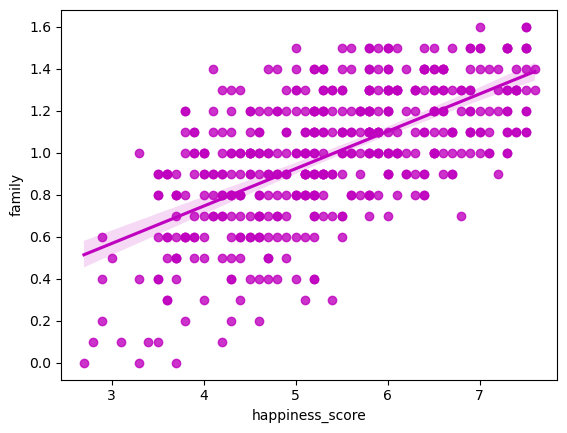

In [23]:
# sns.set_theme(style="darkgrid")
sns.regplot(x=df['happiness_score'],y=df["family"], color="m") #<--Point graph with seaborn.regplot


It illustrates a positive correlation between quality of family life and happiness. The better the quality of family life, the happier the people.

<AxesSubplot:xlabel='happiness_score', ylabel='economy_gdp'>

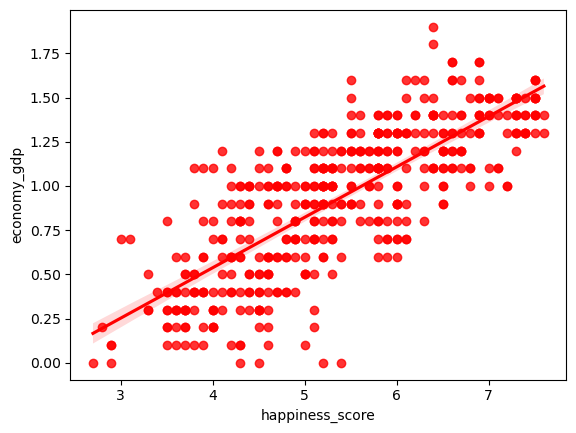

In [24]:
sns.regplot(x=df['happiness_score'],y=df["economy_gdp"], color="r") #<--Point graph with seaborn.regplot


It illustrates a positive correlation between economy_gdp and happiness. The higher the Gross Domestic Product of a country, the happier the people. 

<AxesSubplot:xlabel='happiness_score', ylabel='trust_government_corruption'>

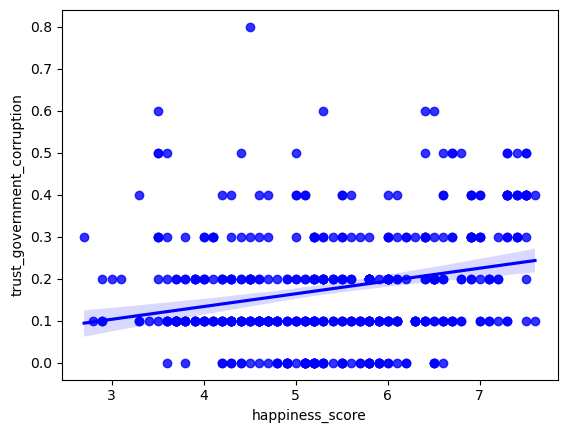

In [25]:
sns.regplot(x=df['happiness_score'],y=df["trust_government_corruption"], color="b") #<--Point graph with seaborn.regplot


It ilustrates that the positive correlation in the previous variable types, does not extend to the relationship between government-trust and happiness. This might be due to the subjectivity of the people's perception of the government and the differents emotions at the moment of rating the government. 

<AxesSubplot:xlabel='happiness_score', ylabel='generosity'>

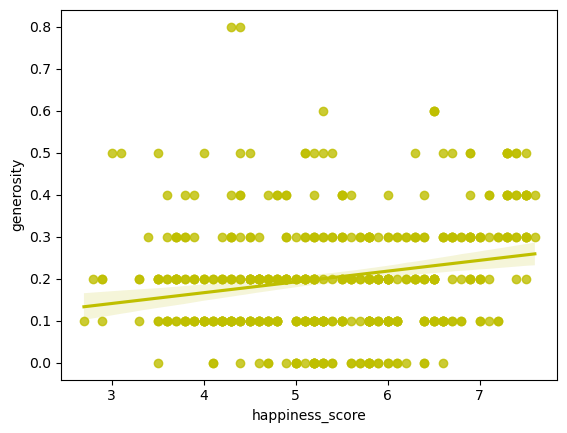

In [26]:
sns.regplot(x=df['happiness_score'],y=df["generosity"], color="y") #<--Point graph with seaborn.regplot


It illustrates the correlation between generosity and happiness is comparatively not as blunt. This is an interesting observation as it may seem counterintuitive.

<AxesSubplot:xlabel='happiness_score', ylabel='health_live_expectancy'>

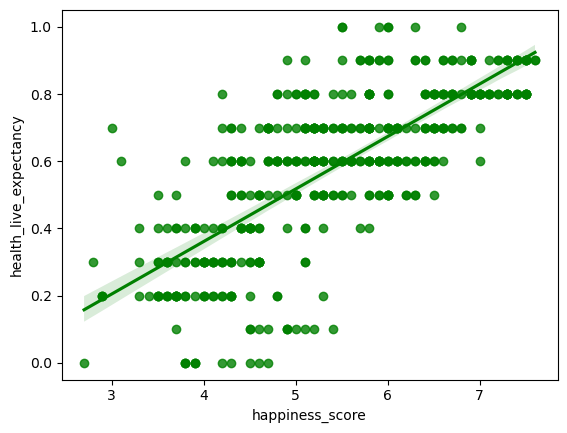

In [27]:
sns.regplot(x=df['happiness_score'],y=df["health_live_expectancy"], color="g") #<--Point graph with seaborn.regplot


As it may be expected, it illustrates the correlation between health and happiness as notably possitive. The better the health care system of a country, the happier the people.

### Multiple correlations:


<AxesSubplot:xlabel='economy_gdp', ylabel='generosity'>

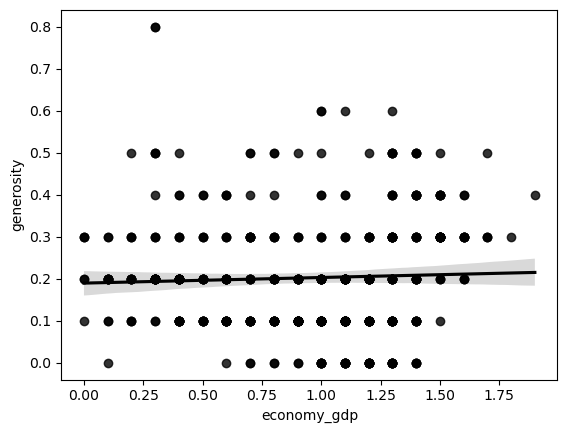

In [28]:
sns.regplot(x=df['economy_gdp'],y=df["generosity"], color="k") #<--Point graph with seaborn.regplot


In this case, this correlation between generosity and economy is not relevant. It is interesting because it may seem ciunterintuitive but it is real, the fact that a country has good economy does not garantee happier people.

<AxesSubplot:xlabel='economy_gdp', ylabel='family'>

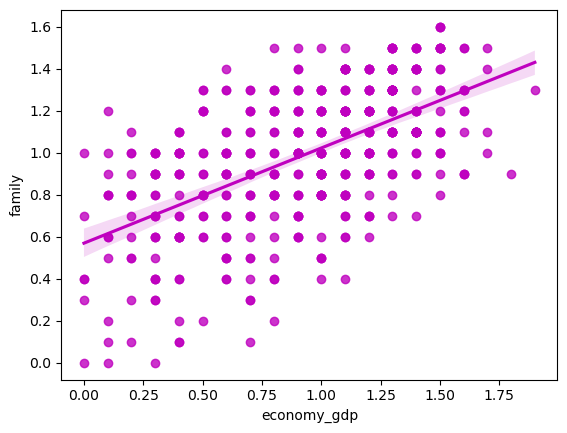

In [29]:
sns.regplot(x=df['economy_gdp'],y=df["family"], color="m") #<--Point graph with seaborn.regplot


It illustrates the correlation between economy and family as positive.

## Close Connections
It is nessesary to close all connections to avoid problems, and avoid unessesary memory usage.


In [30]:
# close the cursor to avoid problems
cursor1.close()

# close the database connection
connection1.close()